In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import csv
import re
import nltk
import random
import string

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator


from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer


from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [2]:
#Import datasets 

twitter_df=pd.read_csv("./Tweets3.csv", sep=",", names=['created_at', 'full_text'])

twitter_df['source'] = 'twitter'

#Import imdb data to pandas dataframe

reddit_df=pd.read_csv("./Reddit.csv", sep=",", names=['created_at', 'full_text'])

reddit_df['source'] = 'reddit'

#Import amazon data to pandas dataframe

news_df=pd.read_csv("./News.csv", sep=",", names=['created_at', 'full_text'])

news_df['source'] = 'news'

In [3]:
# Concatinate the data to one data frame
data=pd.concat([twitter_df,reddit_df,news_df])

In [4]:
#Format/Description 

In [5]:
data.head()

,created_at,full_text,source
NaN,created_at,full_text,twitter
0.0,created_at,text,twitter
1.0,2020-04-15 01:03:46+00:00,"RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...",twitter
2.0,2020-06-25 06:20:06+00:00,#SriLanka surcharge on fuel removed!\n⛽📉\nThe ...,twitter
3.0,2020-06-04 15:41:45+00:00,Net issuance increases to fund fiscal programs...,twitter


In [6]:
data.drop(['created_at'], axis=1, inplace=True)
data

,full_text,source
NaN,full_text,twitter
0.0,text,twitter
1.0,"RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...",twitter
2.0,#SriLanka surcharge on fuel removed!\n⛽📉\nThe ...,twitter
3.0,Net issuance increases to fund fiscal programs...,twitter
...,...,...
3076.0,"According to Kensho, here's how markets have f...",news
3077.0,Jim Cramer revealed his top rule when it comes...,news
3078.0,Jim Cramer broke down why owning fewer stocks ...,news
3079.0,"Jim Cramer built on his ""nobody ever made a di...",news


In [7]:
data.describe()

,full_text,source
count,8680,9098
unique,8166,3
top,"""Mad Money"" host Jim Cramer rings the lightnin...",twitter
freq,147,5002


In [8]:
print('Dataset size:',data.shape)
print('Columns are:',data.columns)

Dataset size: (9098, 2)
Columns are: Index(['full_text', 'source'], dtype='object')


In [9]:
#Original size of datasets 

print('Dataset size:',data[data['source'] == 'twitter'].shape)
print('Dataset size:',data[data['source'] == 'reddit'].shape)
print('Dataset size:',data[data['source'] == 'news'].shape)

Dataset size: (5002, 2)
Dataset size: (1015, 2)
Dataset size: (3081, 2)


In [10]:
#Values missing  = Yes

data.isnull().sum()

full_text    418
source         0
dtype: int64

In [11]:
#Drop null values and create new data frame = data1

data1 = data.dropna()

In [12]:
#Values missing  = None

data1.isnull().sum()

full_text    0
source       0
dtype: int64

In [13]:
data1.head(5)

,full_text,source
NaN,full_text,twitter
0.0,text,twitter
1.0,"RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...",twitter
2.0,#SriLanka surcharge on fuel removed!\n⛽📉\nThe ...,twitter
3.0,Net issuance increases to fund fiscal programs...,twitter


In [14]:
#Values missing  

data1.isnull().sum()

full_text    0
source       0
dtype: int64

In [15]:
data1 = data1.drop_duplicates(subset=['full_text'])

In [16]:
# New size of datasets after dropping null values and duplicates 

print('Dataset size:',data1[data1['source'] == 'twitter'].shape)
print('Dataset size:',data1[data1['source'] == 'reddit'].shape)
print('Dataset size:',data1[data1['source'] == 'news'].shape)

Dataset size: (4845, 2)
Dataset size: (702, 2)
Dataset size: (2619, 2)


In [17]:
data

,full_text,source
NaN,full_text,twitter
0.0,text,twitter
1.0,"RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...",twitter
2.0,#SriLanka surcharge on fuel removed!\n⛽📉\nThe ...,twitter
3.0,Net issuance increases to fund fiscal programs...,twitter
...,...,...
3076.0,"According to Kensho, here's how markets have f...",news
3077.0,Jim Cramer revealed his top rule when it comes...,news
3078.0,Jim Cramer broke down why owning fewer stocks ...,news
3079.0,"Jim Cramer built on his ""nobody ever made a di...",news


In [18]:
data.drop(0, axis=0, inplace=True)
data

,full_text,source
NaN,full_text,twitter
1.0,"RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...",twitter
2.0,#SriLanka surcharge on fuel removed!\n⛽📉\nThe ...,twitter
3.0,Net issuance increases to fund fiscal programs...,twitter
4.0,RT @bentboolean: How much of Amazon's traffic ...,twitter
...,...,...
3076.0,"According to Kensho, here's how markets have f...",news
3077.0,Jim Cramer revealed his top rule when it comes...,news
3078.0,Jim Cramer broke down why owning fewer stocks ...,news
3079.0,"Jim Cramer built on his ""nobody ever made a di...",news


In [19]:
data.reset_index(inplace=True)
data

,index,full_text,source
0,NaN,full_text,twitter
1,1.0,"RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...",twitter
2,2.0,#SriLanka surcharge on fuel removed!\n⛽📉\nThe ...,twitter
3,3.0,Net issuance increases to fund fiscal programs...,twitter
4,4.0,RT @bentboolean: How much of Amazon's traffic ...,twitter
...,...,...,...
9090,3076.0,"According to Kensho, here's how markets have f...",news
9091,3077.0,Jim Cramer revealed his top rule when it comes...,news
9092,3078.0,Jim Cramer broke down why owning fewer stocks ...,news
9093,3079.0,"Jim Cramer built on his ""nobody ever made a di...",news


In [20]:
data.drop(['index'],axis =1, inplace=True)
data

,full_text,source
0,full_text,twitter
1,"RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...",twitter
2,#SriLanka surcharge on fuel removed!\n⛽📉\nThe ...,twitter
3,Net issuance increases to fund fiscal programs...,twitter
4,RT @bentboolean: How much of Amazon's traffic ...,twitter
...,...,...
9090,"According to Kensho, here's how markets have f...",news
9091,Jim Cramer revealed his top rule when it comes...,news
9092,Jim Cramer broke down why owning fewer stocks ...,news
9093,"Jim Cramer built on his ""nobody ever made a di...",news


In [21]:
data.drop(0, axis=0, inplace=True)
data

,full_text,source
1,"RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...",twitter
2,#SriLanka surcharge on fuel removed!\n⛽📉\nThe ...,twitter
3,Net issuance increases to fund fiscal programs...,twitter
4,RT @bentboolean: How much of Amazon's traffic ...,twitter
5,$AMD Ryzen 4000 desktop CPUs looking ‘great’ a...,twitter
...,...,...
9090,"According to Kensho, here's how markets have f...",news
9091,Jim Cramer revealed his top rule when it comes...,news
9092,Jim Cramer broke down why owning fewer stocks ...,news
9093,"Jim Cramer built on his ""nobody ever made a di...",news


In [22]:
# Language detect to check 
#from langdetect import detect
for index, row in data1['full_text'].iteritems():
    try:
        lang = detect(row) #detecting each row
        data1.loc[index, 'language'] = lang
    except:
        language = "error"
        data1.loc[index, 'language'] = 'n/a'

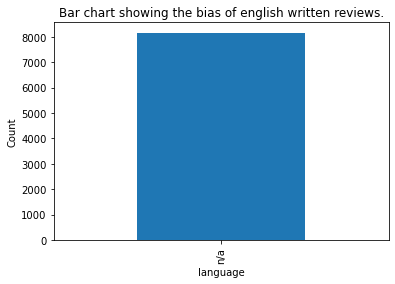

In [23]:
# Plot the distribution of languages - shows how nearly all reviews are written in english
pd.value_counts(data1['language']).plot.bar()
plt.xlabel('language')
plt.ylabel('Count')
plt.title('Bar chart showing the bias of english written reviews.')
plt.show()

In [24]:
#Length of text 

In [25]:
data1['num_words'] = data1['full_text'].apply(lambda x: len(x.split()))
data1['num_chars'] = data1['full_text'].apply(lambda x: len(x))

Text(0.5, 0.98, 'Distribution of Text Lengths')

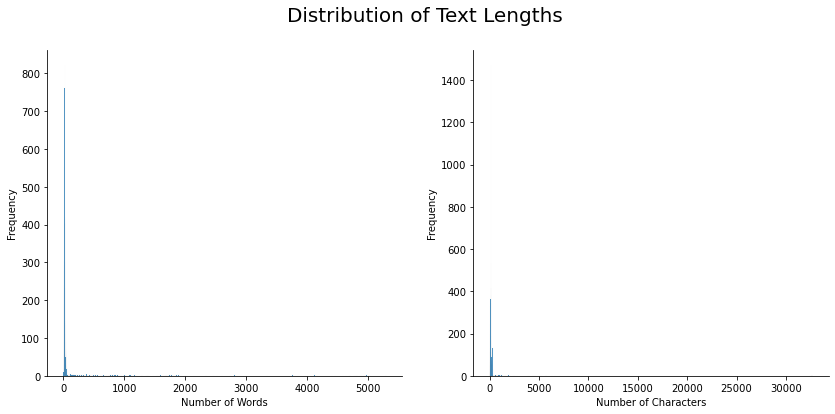

In [26]:
fig_word_char, ax_word_char = plt.subplots(ncols = 2, figsize = (14,6))

sns.histplot(data = data1, x = 'num_words', ax = ax_word_char[0])
ax_word_char[0].spines['right'].set_visible(False)
ax_word_char[0].spines['top'].set_visible(False)
ax_word_char[0].set_xlabel('Number of Words')
ax_word_char[0].set_ylabel('Frequency')

sns.histplot(data = data1, x = 'num_chars', ax = ax_word_char[1])
ax_word_char[1].spines['right'].set_visible(False)
ax_word_char[1].spines['top'].set_visible(False)
ax_word_char[1].set_xlabel('Number of Characters')
ax_word_char[1].set_ylabel('Frequency')

fig_word_char.suptitle('Distribution of Text Lengths', fontsize = 20)

#Make bigger/more clear 

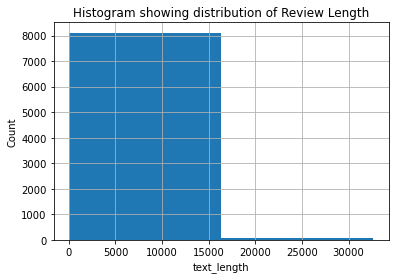

In [27]:
# Histogram for Length of all reviews
data1['text_length']  = data1['full_text'].str.len()
data1['text_length'].hist(bins = 2)
plt.xlabel('text_length')
plt.ylabel('Count')
plt.title('Histogram showing distribution of Review Length')
plt.show()

Text(0.5, 0.98, 'Distribution of Text Lengths - Based on the source')

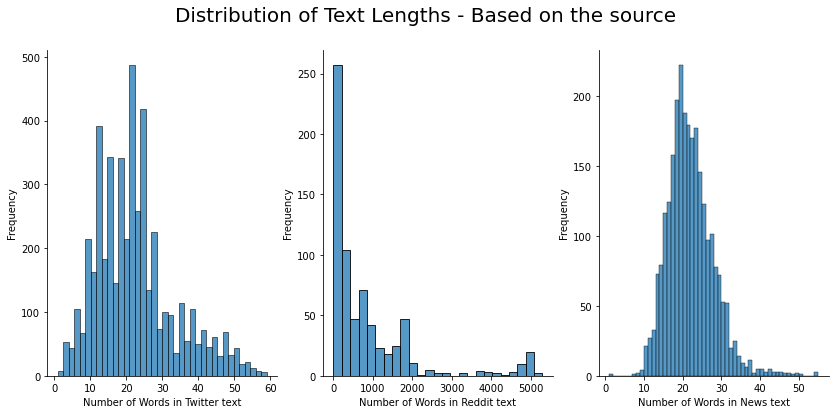

In [28]:
fig_word_char, ax_word_char = plt.subplots(ncols = 3, figsize = (14,6))

sns.histplot(data = data1[data1['source'] == 'twitter'], x = 'num_words', ax = ax_word_char[0])
ax_word_char[0].spines['right'].set_visible(False)
ax_word_char[0].spines['top'].set_visible(False)
ax_word_char[0].set_xlabel('Number of Words in Twitter text')
ax_word_char[0].set_ylabel('Frequency')

sns.histplot(data = data1[data1['source'] == 'reddit'], x = 'num_words', ax = ax_word_char[1])
ax_word_char[1].spines['right'].set_visible(False)
ax_word_char[1].spines['top'].set_visible(False)
ax_word_char[1].set_xlabel('Number of Words in Reddit text')
ax_word_char[1].set_ylabel('Frequency')

sns.histplot(data = data1[data1['source'] == 'news'], x = 'num_words', ax = ax_word_char[2])
ax_word_char[2].spines['right'].set_visible(False)
ax_word_char[2].spines['top'].set_visible(False)
ax_word_char[2].set_xlabel('Number of Words in News text')
ax_word_char[2].set_ylabel('Frequency')


fig_word_char.suptitle('Distribution of Text Lengths - Based on the source', fontsize = 20)

In [29]:
data2 = data1['num_words']

In [30]:
result = data2.mean(skipna = True)
  
# Print the result
print(result)

96.03355375949057


In [31]:
data3 = data1['num_words'][data1['source'] == 'twitter']

In [32]:
result = data3.mean(skipna = True)
  
# Print the result
print(result)

22.502579979360164


In [33]:
data4 = data1['num_words'][data1['source'] == 'reddit']

In [34]:
result = data4.mean(skipna = True)
  
# Print the result
print(result)

881.3917378917379


In [35]:
data5 = data1['num_words'][data1['source'] == 'news']

In [36]:
result = data5.mean(skipna = True)
  
# Print the result
print(result)

21.553264604810998


In [35]:
#Average word length? 

(-0.5, 399.5, 199.5, -0.5)

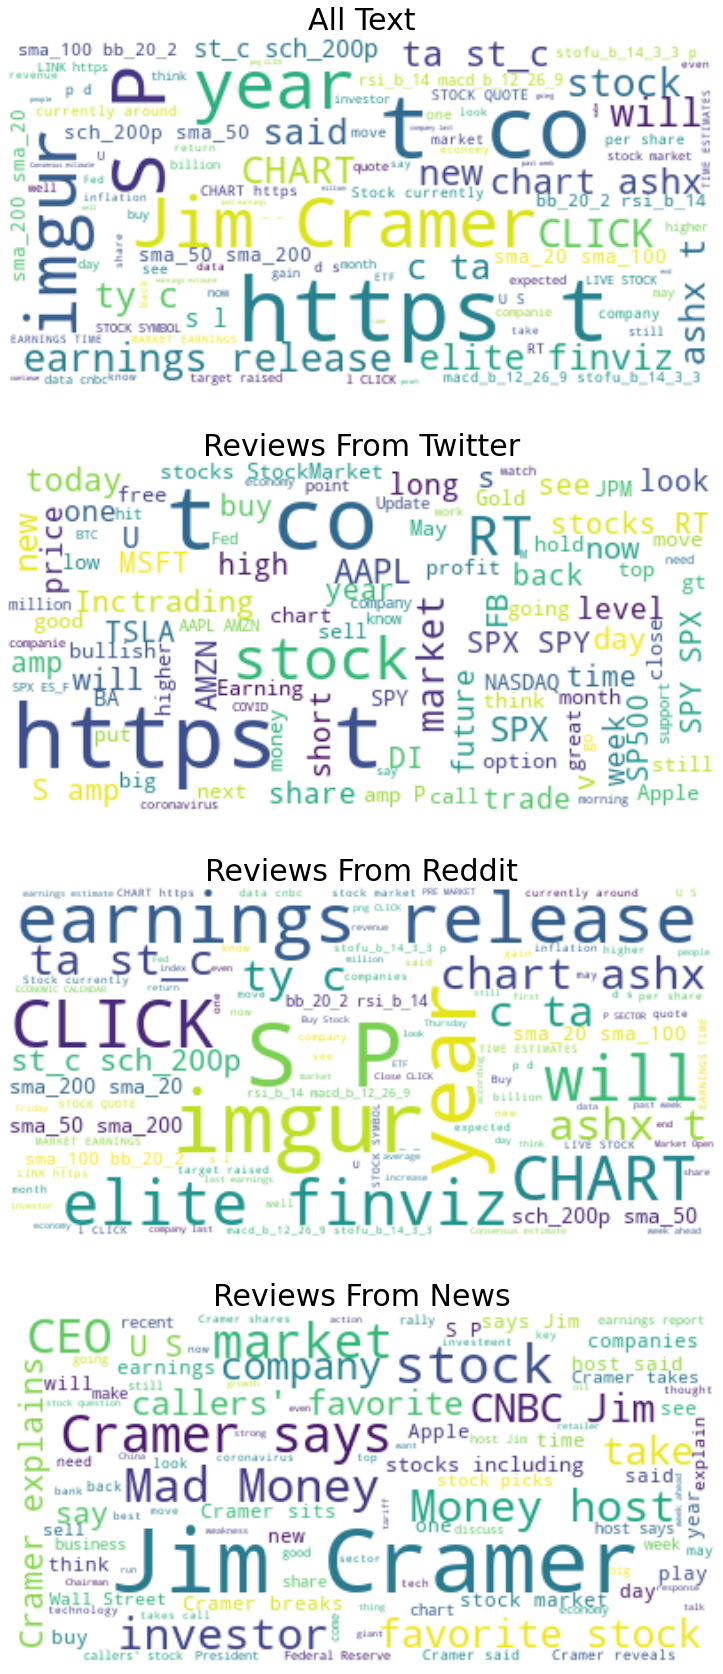

In [36]:
# Word Clouds For all, amazon, yelp, imdb

# Start with one review:
data_twitter = data1[data1['source']=='twitter']
data_reddit = data1[data1['source']=='reddit']
data_news = data1[data1['source']=='news']
full_text_All = " ".join(full_text for full_text in data1.full_text)
full_text_twitter = " ".join(full_text for full_text in data_twitter.full_text)
full_text_reddit = " ".join(full_text for full_text in data_reddit.full_text)
full_text_news = " ".join(full_text for full_text in data_news.full_text)

fig, ax = plt.subplots(4, 1, figsize  = (30,30))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(full_text_All)
wordcloud_amazon = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(full_text_twitter)
wordcloud_yelp = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(full_text_reddit)
wordcloud_imdb = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(full_text_news)

# Display the generated image:
ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('All Text', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_amazon, interpolation='bilinear')
ax[1].set_title('Reviews From Twitter',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_yelp, interpolation='bilinear')
ax[2].set_title('Reviews From Reddit',fontsize=30)
ax[2].axis('off')
ax[3].imshow(wordcloud_imdb, interpolation='bilinear')
ax[3].set_title('Reviews From News',fontsize=30)
ax[3].axis('off')

#Remove stopwords?

Text(0.5, 0.98, 'Distribution of uppercase words')

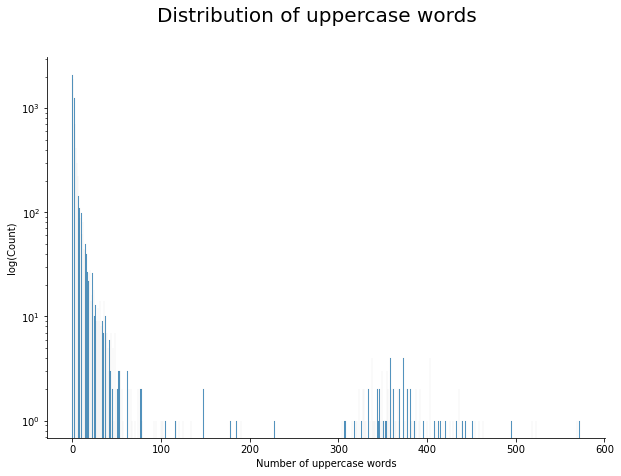

In [42]:
# Upper case words for VADER -> Useful to keep 

fig_upper, ax_upper = plt.subplots(figsize = (10,7))

data1['upper_count'] = data1['full_text'].apply(lambda x: len([w for w in x.split() if w.isupper()]))

sns.histplot(data = data1, x = 'upper_count', ax = ax_upper)
ax_upper.set_yscale('log')
ax_upper.set_ylabel('log(Count)')
ax_upper.set_xlabel('Number of uppercase words')
ax_upper.spines['right'].set_visible(False)
ax_upper.spines['top'].set_visible(False) 
fig_upper.suptitle('Distribution of uppercase words', fontsize = 20)

#Make bigger/more clear 

In [38]:
data6 = data1['upper_count']

In [39]:
result = data6.mean(skipna = True)
  
# Print the result
print(result)

9.088782757776144
